## Loading data

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb

import matplotlib.pyplot as plt

In [2]:
# filename = "Lymphoma-P1"
filename = "Lung_Cancer-P1"
df = pd.read_csv(f'../data/{filename}.csv')

In [3]:
df.head(10)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT01829373,Lung Cancer Vaccine Plus Oral Dietary Supplement,NaN,Completed,No Results Available,Lung Cancer,Biological: vaccine 1650-G,Immunologic response to vaccine,Edward Hirschowitz|University of Louisville|Un...,...,BG1006,October 2011,June 2012,February 2013,"April 11, 2013",NaN,"April 11, 2013","University of Kentucky, Lexington, Kentucky, U...",NaN,https://ClinicalTrials.gov/show/NCT01829373
1,2,NCT00401778,Trial of RAD001 in Patients With Operable Non-...,NaN,Completed,Has Results,Lung Cancer,Drug: RAD001,Clinical Response as Assessed Metabolically by...,Emory University,...,IRB00024810,November 2006,December 2013,December 2013,"November 22, 2006","July 14, 2015","December 21, 2016","Emory University Winship Cancer Institute, Atl...",NaN,https://ClinicalTrials.gov/show/NCT00401778
2,3,NCT00132054,Amrubicin and Irinotecan in Treating Patients ...,NaN,Completed,No Results Available,Lung Cancer,Drug: amrubicin hydrochloride|Drug: irinotecan...,NaN,Japan Multinational Trial Organization|Nationa...,...,JMTO-LC03-03|CDR0000439464,May 2004,December 2006,November 2008,"August 19, 2005",NaN,"May 30, 2013","Gunma Cancer Center, Gunma, Japan|National Hos...",NaN,https://ClinicalTrials.gov/show/NCT00132054
3,4,NCT02429843,A Study of TRC105 in Combination With Paclitax...,NaN,Completed,No Results Available,Lung Cancer,Drug: TRC105,Number of patients with a change in medical ma...,University of Alabama at Birmingham|Tracon Pha...,...,F150128005 (UAB 1504),"November 2, 2015",December 2018,December 2019,"April 29, 2015",NaN,"June 28, 2021","UAB Comprehensive Cancer Center, Birmingham, A...",NaN,https://ClinicalTrials.gov/show/NCT02429843
4,5,NCT00084799,Monoclonal Antibody Therapy in Treating Patien...,NaN,Completed,Has Results,Lung Cancer,Biological: monoclonal antibody hu3S193,Confirmation of Tumor Targeting as Measured by...,Ludwig Institute for Cancer Research|National ...,...,LUD2002-015|MSKCC 04-012|CDR0000365621,"July 26, 2004","January 25, 2006","December 20, 2006","June 11, 2004","February 8, 2022","October 10, 2022","Memorial Sloan-Kettering Cancer Center, New Yo...",NaN,https://ClinicalTrials.gov/show/NCT00084799
5,6,NCT01486602,Specialized Radiation Therapy and Chemotherapy...,NaN,Completed,No Results Available,Lung Cancer,Drug: carboplatin|Drug: paclitaxel|Radiation: ...,Maximum-tolerated RT dose fraction|Radiographi...,Alliance for Clinical Trials in Oncology|Natio...,...,CALGB 31102|CDR0000719011|NCI-2012-00087|U10CA...,March 2012,January 2017,"January 16, 2018","December 6, 2011",NaN,"January 19, 2018","Mayo Clinic Hospital, Phoenix, Arizona, United...",NaN,https://ClinicalTrials.gov/show/NCT01486602
6,7,NCT00005022,Radiation Therapy Plus Combination Chemotherap...,NaN,Completed,No Results Available,Lung Cancer,Drug: cisplatin|Drug: etoposide|Radiation: rad...,Frequency of patients developing unacceptable ...,Radiation Therapy Oncology Group|National Canc...,...,RTOG-9712|CDR0000065797,February 1998,October 2002,June 2010,"January 29, 2004",NaN,"November 3, 2013",University of Alabama at Birmingham Comprehens...,NaN,https://ClinicalTrials.gov/show/NCT00005022
7,8,NCT00004225,Gene Therapy Plus Radiation Therapy in Treatin...,NaN,Completed,No Results Available,Lung Cancer,Biological: Ad5CMV-p53 gene|Radiation: radiati...,NaN,Eastern Cooperative Oncology Group|National Ca...,...,CDR0000067466|ECOG-8597,January 2000,NaN,NaN,"January 27, 2003",NaN,"July 7, 2010",Vanderbilt-Ingram Cancer Center at Vanderbilt ...,NaN,https://ClinicalTrials.gov/show/NCT00004225
8,9,NCT00052494,Combination Chemotherapy and Imatinib Mesylate...,NaN,Completed,No Results Available,Lung Cancer,Drug: cisplatin|Drug: imatinib mesylate|Drug: ...,NaN,"University Health Network, Toronto|Na

## Convert datatime columns to duation

In [4]:
for col_name in ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted']:
    df[col_name] = df[col_name].apply(pd.to_datetime)
df['duration'] = (df['Completion Date'] - df['Start Date']).dt.days

In [5]:
df.head(10)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,duration
0,1,NCT01829373,Lung Cancer Vaccine Plus Oral Dietary Supplement,NaN,Completed,No Results Available,Lung Cancer,Biological: vaccine 1650-G,Immunologic response to vaccine,Edward Hirschowitz|University of Louisville|Un...,...,2011-10-01,2012-06-01,2013-02-01,2013-04-11,NaN,2013-04-11,"University of Kentucky, Lexington, Kentucky, U...",NaN,https://ClinicalTrials.gov/show/NCT01829373,489.0
1,2,NCT00401778,Trial of RAD001 in Patients With Operable Non-...,NaN,Completed,Has Results,Lung Cancer,Drug: RAD001,Clinical Response as Assessed Metabolically by...,Emory University,...,2006-11-01,2013-12-01,2013-12-01,2006-11-22,"July 14, 2015",2016-12-21,"Emory University Winship Cancer Institute, Atl...",NaN,https://ClinicalTrials.gov/show/NCT00401778,2587.0
2,3,NCT00132054,Amrubicin and Irinotecan in Treating Patients ...,NaN,Completed,No Results Available,Lung Cancer,Drug: amrubicin hydrochloride|Drug: irinotecan...,NaN,Japan Multinational Trial Organization|Nationa...,...,2004-05-01,2006-12-01,2008-11-01,2005-08-19,NaN,2013-05-30,"Gunma Cancer Center, Gunma, Japan|National Hos...",NaN,https://ClinicalTrials.gov/show/NCT00132054,1645.0
3,4,NCT02429843,A Study of TRC105 in Combination With Paclitax...,NaN,Completed,No Results Available,Lung Cancer,Drug: TRC105,Number of patients with a change in medical ma...,University of Alabama at Birmingham|Tracon Pha...,...,2015-11-02,2018-12-01,2019-12-01,2015-04-29,NaN,2021-06-28,"UAB Comprehensive Cancer Center, Birmingham, A...",NaN,https://ClinicalTrials.gov/show/NCT02429843,1490.0
4,5,NCT00084799,Monoclonal Antibody Therapy in Treating Patien...,NaN,Completed,Has Results,Lung Cancer,Biological: monoclonal antibody hu3S193,Confirmation of Tumor Targeting as Measured by...,Ludwig Institute for Cancer Research|National ...,...,2004-07-26,2006-01-25,2006-12-20,2004-06-11,"February 8, 2022",2022-10-10,"Memorial Sloan-Kettering Cancer Center, New Yo...",NaN,https://ClinicalTrials.gov/show/NCT00084799,877.0
5,6,NCT01486602,Specialized Radiation Therapy and Chemotherapy...,NaN,Completed,No Results Available,Lung Cancer,Drug: carboplatin|Drug: paclitaxel|Radiation: ...,Maximum-tolerated RT dose fraction|Radiographi...,Alliance for Clinical Trials in Oncology|Natio...,...,2012-03-01,2017-01-01,2018-01-16,2011-12-06,NaN,2018-01-19,"Mayo Clinic Hospital, Phoenix, Arizona, United...",NaN,https://ClinicalTrials.gov/show/NCT01486602,2147.0
6,7,NCT00005022,Radiation Therapy Plus Combination Chemotherap...,NaN,Completed,No Results Available,Lung Cancer,Drug: cisplatin|Drug: etoposide|Radiation: rad...,Frequency of patients developing unacceptable ...,Radiation Therapy Oncology Group|National Canc...,...,1998-02-01,2002-10-01,2010-06-01,2004-01-29,NaN,2013-11-03,University of Alabama at Birmingham Comprehens...,NaN,https://ClinicalTrials.gov/show/NCT00005022,4503.0
7,8,NCT00004225,Gene Therapy Plus Radiation Therapy in Treatin...,NaN,Completed,No Results Available,Lung Cancer,Biological: Ad5CMV-p53 gene|Radiation: radiati...,NaN,Eastern Cooperative Oncology Group|National Ca...,...,2000-01-01,NaT,NaT,2003-01-27,NaN,2010-07-07,Vanderbilt-Ingram Cancer Center at Vanderbilt ...,NaN,https://ClinicalTrials.gov/show/NCT00004225,NaN
8,9,NCT00052494,Combination Chemotherapy and Imatinib Mesylate...,NaN,Completed,No Results Available,Lung Cancer,Drug: cisplatin|Drug: imatinib mesylate|Drug: ...,NaN,"University Health Network, Toronto|National Ca...",...,2003-04-01,2009-02-01,NaT,2003-01-27,NaN,2015-07-23,"Princess Margaret Hospital, Toronto, Ontario, ...",NaN,https://ClinicalTrials.gov/show/NCT00052494,NaN
9,10,NCT00045604,Imatinib Mesylate and Chemotherapy in Treating...,NaN,Completed,No Results Available,Lung Cancer,Drug: cisplatin|Drug: imatinib mesylate|Drug:

In [6]:
# Remove invalid rows
df = df[~df.duration.isna()]


df = df.drop(['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted'], axis=1)

#df.duration = df.duration.astype(int)
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

In [7]:
df.head(1).transpose()

,0
rank,1
nct_number,NCT01829373
title,Lung Cancer Vaccine Plus Oral Dietary Supplement
acronym,NaN
status,Completed
study_results,No Results Available
conditions,Lung Cancer
interventions,Biological: vaccine 1650-G
outcome_measures,Immunologic response to vaccine
sponsor/collaborators,Edward Hirschowitz|University of Louisville|Un...


## Analze Outcome measures

In [8]:
import re
from collections import defaultdict
# Transfor string to class
class_mapping = {}
#col_names = ['Study Results']
#for col_name in col_names:
#    all[col_name].value_counts().head(10).index.tolist()
measure_count = defaultdict(int)
synonymous = {}
processed_measure = {}
invalid_row_ids = []
print(df.shape)
#df = df[df['outcome_measures'].apply(lambda x: type(x)==str)]
#print(df.shape)
df['outcome_measures'] = df['outcome_measures'].apply(lambda x: "" if type(x)!=str else x.replace(";", ""))
skip_words = ['Phase', 'phase']
for measures in df.outcome_measures:
    new_measures = []
    for measure in measures.split('|'):
        if any(word in measure for word in ["AEs", "Adverse Events", "Adverse events", "adverse events"]):
            measure = measure.lower()
            synonymous[measure] = "AEs"
        elif any(word in measure for word in ["overall survival", "Overvall survival"]):
            measure = measure.lower()
            synonymous[measure] = "OS"
        else:
            pattern = r"\((.*?)\)"
            matches = re.findall(pattern, measure)

            for w in skip_words:
                matches = [match for match in matches if not w in match]

            measure = re.sub(r"\([^()]*\)", "", measure)
            measure = measure.strip()
            measure = measure.lower()
            if matches:
                synonymous[measure] = matches[-1]

        measure_count[measure] += 1
        new_measures.append(measure)
    processed_measure[measures] = new_measures

sorted_measure_count = sorted(measure_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_measure_count[:10])
#print(processed_measure["Define the Maximum Tolerated Dose (MTD) and Recommended Phase Two Dose (RPTD) of the combination of everolimus with pemetrexed, carboplatin, and bevacizumab in patients with Stage IV non-squamous NSCLC.|Number of Participants with Adverse Events as a Measure of Safety and Tolerability|Antitumor efficacy associated with administration of everolimus/pemetrexed/carboplatin/bevacizumab administration in patients with Stage IV non-squamous NSCLC.|Progression-free survival (PFS)|Overall Survival (OS)"])
#synonymous.update({"Adverse Events": "AEs",
#                   "Number of Participants With Death As Outcome, Serious Adverse Events (SAEs), Drug-related SAEs, Drug-related Adverse Events (AEs), AEs Leading to Discontinuation, Drug-related AEs Leading to Discontinuation": "AEs",
#                   "Number of Participants with Adverse events (AE) and Serious Adverse Events (SAEs)": "AEs",
#                   "AEs, laboratory parameters": "AEs",
#                   "Percentage of Participants with Adverse Events": "AEs"
#                  })
from collections import Counter
synonymous_count = Counter(synonymous.values())
synonymous = {key:val for key, val in synonymous.items() if synonymous_count[val]>1}
sorted_synonymous_count = sorted(synonymous_count.items(), key=lambda x:x[1])

# merge synonymous with smaller count to larger count, ex: pfs->PFS
#for i in range(len(sorted_synonymous_count)):
#    if sorted_synonymous_count[i][1] > 1:
#        for j in range(i+1, len(sorted_synonymous_count)):
#            if sorted_synonymous_count[j][0].lower() == sorted_synonymous_count[i][0].lower():
#                synonymous[sorted_synonymous_count[j][0]] = sorted_synonymous_count[i][0]
#print(synonymous_count['mtd'])
    
print(sorted(synonymous_count.items(), key=lambda x:x[1], reverse=True))



(840, 23)
[('overall survival', 111), ('progression-free survival', 75), ('progression free survival', 67), ('duration of response', 55), ('objective response rate', 50), ('', 45), ('maximum tolerated dose', 28), ('disease control rate', 26), ('response rate', 20), ('overall response rate', 20)]
[('AEs', 363), ('Cmax', 144), ('PFS', 85), ('MTD', 80), ('Tmax', 72), ('ORR', 58), ('AUC', 51), ('OS', 50), ('DLTs', 50), ('DOR', 40), ('DLT', 39), ('Ctrough', 37), ('RECIST', 36), ('t1/2', 33), ('DCR', 31), ('PK', 31), ('Cmin', 26), ('RP2D', 26), ('AUClast', 23), ('ADA', 22), ('AUCtau', 18), ('anti-fucosyl-GM1', 17), ('CL', 16), ('ECG', 13), ('TTP', 13), ('SHBG', 13), ('AMG 888', 12), ('dn', 12), ('NSCLC', 11), ('PR', 11), ('SD', 11), ('OR', 11), ('AUC0-t', 11), ('HuMax-TF-ADC', 11), ('Conjugated and Non-conjugated', 11), ('RPTD', 10), ('TTR', 10), ('MMAE', 10), ('DoR', 10), ('AZ5104 and AZ7550', 10), ('Parts C Plus F', 10), ('PD', 9), ('AUCinf', 9), ('CL/F', 9), ('Vss', 9), ('T1/2', 8), ('AE'

In [9]:
# merge similar measures
import spacy
import json

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_md")

n_measure = len(measure_count)
print(n_measure)
merged_measure_count = {}


# Union Find to group measures

class DSU:
    def __init__(self):
        self.par = {x: x for x in synonymous.values()}
        self.par.update({x: synonymous.get(x, x) for x in measure_count})
        #for w1 in synonymous.values():
        #    for w2 in measure_count:
        #        if w1.lower() == w2.lower():
        #            self.par[w2] = w1
        # self.par["DLTs"] = "DLT"

    def find(self, x):
        if self.par[x] != x:
            self.par[x] = self.find(self.par[x])
        return self.par[x]

    def union(self, x, y):
        if self.find(x) == self.find(y):
            return False
        else:
            self.par[self.find(x)] = self.find(y)
            return True

dsu = DSU()
"""
print(synonymous['overall survival'])
synonymous_list = defaultdict(list)
for x, y in synonymous.items():
    synonymous_list[y].append(x)
c = 0
for m1, _ in sorted_measure_count[:100]:
    c += 1
    print(m1, c)
    if m1 in synonymous:
        print(synonymous[m1])
        continue
    highest_score_class, highest_score = None, 0
    doc1 = nlp(m1)
    for class_name, members in sorted(synonymous_list.items(), key=lambda x: sum(measure_count[y] for y in x[1]), reverse=True)[:100]:
        for m2 in members:
            doc2 = nlp(m2)
            similarity_score = doc1.similarity(doc2)
            if similarity_score < 0.3:
                break
            if similarity_score > 0.9 and similarity_score > highest_score:
                highest_score_class = class_name
                highest_score = similarity_score
    if not highest_score_class:
        highest_score_class = m1
    synonymous[m1] = highest_score_class
    synonymous_list[highest_score_class].append(m1)
    print(f"new synonymous {highest_score_class}")

for x, _ in sorted_measure_count:
    par = synonymous[x]
    if par not in merged_measure_count:
        merged_measure_count[par] = measure_count[x]
    else:
        merged_measure_count[par] += measure_count[x]
"""

""""""
for i in range(100):
    # print(i)
    m1, count1 = sorted_measure_count[i]
    doc1 = nlp(m1)
    for j in range(i+1, 100):
        m2, count2 = sorted_measure_count[j]
        doc2 = nlp(m2)

        # Compute the similarity between the two sentences
        if doc1.similarity(doc2) > 0.95:
            # print(f"{m1}, {m2}")
            dsu.union(m2, m1)

for x in dsu.par:
    dsu.par[x] = dsu.find(x)


""""""
merged_measure_members = {par: [] for par in dsu.par.values()}
for x in dsu.par:
    merged_measure_members[dsu.par[x]].append(x)

with open("../data/synonymous_measure.json", "w") as f:
    json.dump(merged_measure_members, f)
    parent = dsu.par

"""
from sentence_transformers import SentenceTransformer, util
if filename == "Lymphoma-P1":
    
    model = SentenceTransformer('all-MiniLM-L6-v2')

    for i in range(100):
        print(i)
        m1, count1 = sorted_measure_count[i]
        for j in range(i+1, 100):
            m2, count2 = sorted_measure_count[j]
            embeddings = model.encode([m1, m2], convert_to_tensor=True)
            cosine_scores = util.cos_sim(embeddings, embeddings)
            # Compute the similarity between the two sentences
            #if 'number of participants who experienced an adverse event' in [m1, m2]:
            #    print(f"{m1}, {m2}: {cosine_scores[0][1]}")
            if cosine_scores[0][1] > 0.825:
                print(f"{m1}, {m2}: {cosine_scores[0][1]}")
                dsu.union(m2, m1)
                print(dsu.par[m1], dsu.par[m2])
            
    for x in dsu.par:
        dsu.par[x] = dsu.find(x)
    for x, _ in sorted_measure_count:
        par = dsu.par[x]
        if par not in merged_measure_count:
            merged_measure_count[par] = measure_count[x]
        else:
            merged_measure_count[par] += measure_count[x]

    

    merged_measure_members = {par: [] for par in dsu.par.values()}
    for x in dsu.par:
        merged_measure_members[dsu.par[x]].append(x)
    with open("../data/synonymous_measure.json", "w") as f:
        json.dump(merged_measure_members, f)
        parent = dsu.par
"""

4735


/tmp/ipykernel_210402/3143790994.py:85: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  if doc1.similarity(doc2) > 0.95:


'\nfrom sentence_transformers import SentenceTransformer, util\nif filename == "Lymphoma-P1":\n    \n    model = SentenceTransformer(\'all-MiniLM-L6-v2\')\n\n    for i in range(100):\n        print(i)\n        m1, count1 = sorted_measure_count[i]\n        for j in range(i+1, 100):\n            m2, count2 = sorted_measure_count[j]\n            embeddings = model.encode([m1, m2], convert_to_tensor=True)\n            cosine_scores = util.cos_sim(embeddings, embeddings)\n            # Compute the similarity between the two sentences\n            #if \'number of participants who experienced an adverse event\' in [m1, m2]:\n            #    print(f"{m1}, {m2}: {cosine_scores[0][1]}")\n            if cosine_scores[0][1] > 0.825:\n                print(f"{m1}, {m2}: {cosine_scores[0][1]}")\n                dsu.union(m2, m1)\n                print(dsu.par[m1], dsu.par[m2])\n            \n    for x in dsu.par:\n        dsu.par[x] = dsu.find(x)\n    for x, _ in sorted_measure_count:\n        par 

In [10]:
with open("../data/synonymous_measure.json") as f:
    merged_measure_members = json.load(f)
    parent = defaultdict(str)
    for par, members in merged_measure_members.items():
        for member in members:
            if par not in merged_measure_count:
                merged_measure_count[par] = measure_count[member]
            else:
                merged_measure_count[par] += measure_count[member]
            parent[member] = par

print(sorted(merged_measure_count.items(), key=lambda x: x[1], reverse=True)[:10])
print(merged_measure_members)
        
# print(dsu.par['Duration of Hospital Stay Following Surgery.'.lower()])
# merged_measure_count['safety']

[('OR', 431), ('PFS', 240), ('OS', 170), ('Cmax', 153), ('ORR', 151), ('DLT', 125), ('MTD', 109), ('DOR', 104), ('Treatment B', 82), ('DCR', 56)]
{'NSCLC': ['NSCLC', 'effects of rad001 on the regulation of key proteins involved with the mammalian target of rapamycin  axis in tumor specimens and buccal mucosa in patients with operable non-small cell lung cancer .', 'recommended phase 2 dose  of veliparib  in combination with nivolumab and platinum doublet chemotherapy in participants with metastatic or advanced non-small cell lung cancer .', 'area under the plasma concentration versus time curve  for pertuzumab  in the presence of erlotinib  in patients with non-small cell lung cancer', 'to determine the recommended dosage of imo-2055 when combined with erlotinib and bevacizumab in patients with ajcc stage 3 or 4 histologically proven non-small cell lung cancer .', 'duration of response in participants with non-small cell lung cancer', 'progression free survival  in patients with relaps

In [11]:
top_10_measures = sorted(merged_measure_count.keys(), key=lambda x: merged_measure_count[x], reverse=True)[:10]
for measure_name in top_10_measures:
    df[f"measure_{measure_name}"] = df.outcome_measures.apply(lambda x: any(parent[m.lower()]==measure_name for m in processed_measure[x]))
df["lead_outcome_measure"] = df.outcome_measures.apply(lambda x: parent[processed_measure[x][0].lower()] if processed_measure[x] and parent[processed_measure[x][0].lower()] in top_10_measures else "Others")
df["number_of_measures"] = df.outcome_measures.apply(lambda x: len(x.split("|")))

In [12]:
print(df.outcome_measures[0])
df.head(106).transpose()

Immunologic response to vaccine


,0,1,2,3,4,5,6,10,11,12,...,106,107,108,109,110,111,113,114,115,116
rank,1,2,3,4,5,6,7,11,12,13,...,107,108,109,110,111,112,114,115,116,117
nct_number,NCT01829373,NCT00401778,NCT00132054,NCT02429843,NCT00084799,NCT01486602,NCT00005022,NCT00062322,NCT00059761,NCT00857025,...,NCT01121575,NCT01302808,NCT00569114,NCT00731952,NCT00633724,NCT01454102,NCT00874588,NCT00870532,NCT00654758,NCT00666692
title,Lung Cancer Vaccine Plus Oral Dietary Supplement,Trial of RAD001 in Patients With Operable Non-...,Amrubicin and Irinotecan in Treating Patients ...,A Study of TRC105 in Combination With Paclitax...,Monoclonal Antibody Therapy in Treating Patien...,Specialized Radiation Therapy and Chemotherapy...,Radiation Therapy Plus Combination Chemotherap...,Neoadjuvant Chemoradiotherapy Followed By Surg...,Chemotherapy Combined With Radiation Therapy i...,Beta-Glucan in Treating Patients With Locally ...,...,A Study Of Combined C- MET Inhibitor And PAN-H...,Romidepsin and Erlotinib Hydrochloride in Trea...,Phase 1 Study of TG01 and Erlotinib in Non-sma...,Phase I Study of Induction Therapy With VELCAD...,Multiple-Vaccine Therapy in Treating Patients ...,Study of Nivolumab (BMS-936558) in Combination...,Peptide Vaccine Targeting to Cancer Specific A...,Study of Combination of Metronomic Oral Vinore...,A Phase 1b Study With Volociximab in Combinati...,A Phase 1b Study With Volociximab in Combinati...
acronym,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,...,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed
study_results,No Results Available,Has Results,No Results Available,No Results Available,Has Results,No Results Available,No Results Available,No Results Available,No Results Available,No Results Available,...,Has Results,Has Results,No Results Available,No Results Available,No Results Available,Has Results,No Results Available,No Results Available,No Results Available,No Results Available
conditions,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,...,Non Small Cell Lung Cancer,Lung Cancer|Metastatic Cancer,Non-small Cell Lung Cancer,Non Small Cell Lung Cancer,Non Small Cell Lung Cancer,Non-small Cell Lung Cancer,Non Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non-small Cell Lung Cancer,Non-small Cell Lung Cancer
interventions,Biological: vaccine 1650-G,Drug: RAD001,Drug: amrubicin hydrochloride|Drug: irinotecan...,Drug: TRC105,Biological: monoclonal antibody hu3S193,Drug: carboplatin|Drug: paclitaxel|Radiation: ...,Drug: cisplatin|Drug: etoposide|Radiation: rad...,Drug: cisplatin|Drug: irinotecan hydrochloride...,Drug: cisplatin|Drug: irinotecan hydrochloride...,Biological: beta-glucan MM-10-001|Other: flow ...,...,Drug: PF-02341066|Drug: PF-00299804,Combination Product: Erlotinib plus Romidepsin...,Drug: TG01,Drug: Velcade and Vorinostat,"Biological: HLA-A*2402restricted URLC10, TTK, ...",Biological: Nivolumab|Drug: Gemcitabine|Drug: ...,"Biological: HLA-A*2402restricted URLC10, CDCA1...",Drug: oral vinorelbine|Drug: sorafenib,"Drug: M200 (Volociximab), Carboplatin, Paclitaxel","Drug: M200 (Volociximab), Carboplatin, Paclita..."
outcome_measures,Immunologic response to vaccine,Clinical Response as Assessed Metabolically by...,,Number of patients with a change in medical ma...,Confirmation of Tumor Targeting as Measured by...,Maximum-tolerated RT dose fraction|Radiographi...,Frequency of patients developing unacceptable ...,,Maximum tolerated dose of irinotecan in combin...,Safety|Maximum-tolerated dose|Toxicity as asse...,...,Overview of Treatment-emergent All Causalities...,Number of Participants With Dose Limiting Toxi...,"Saftey, maximum tolerated dose, optimal biolog...",Adverse events|Tumor response,"Adverse effects, dose limiting toxicity, and m...",Number of Participa

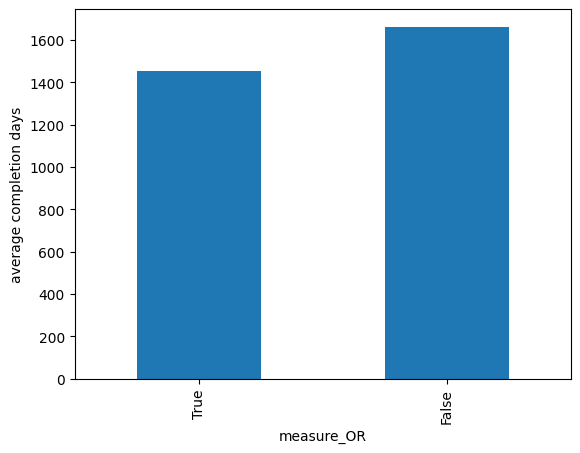

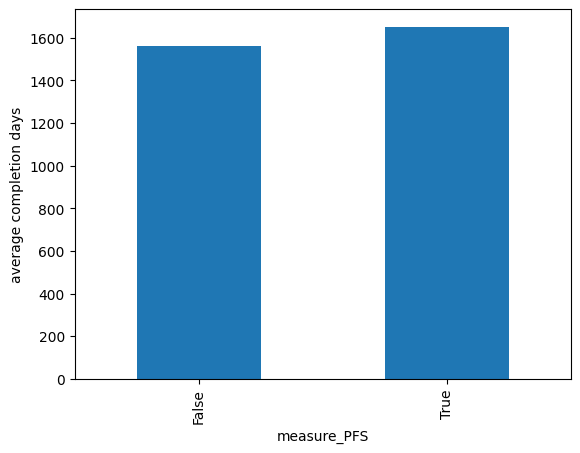

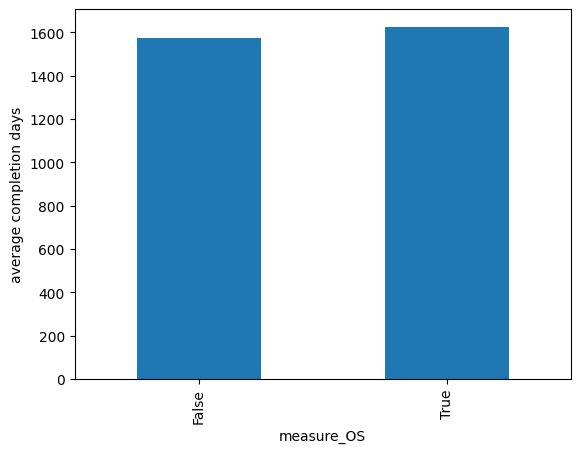

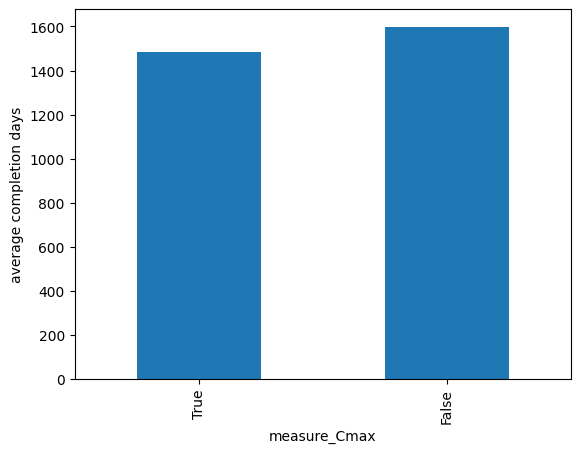

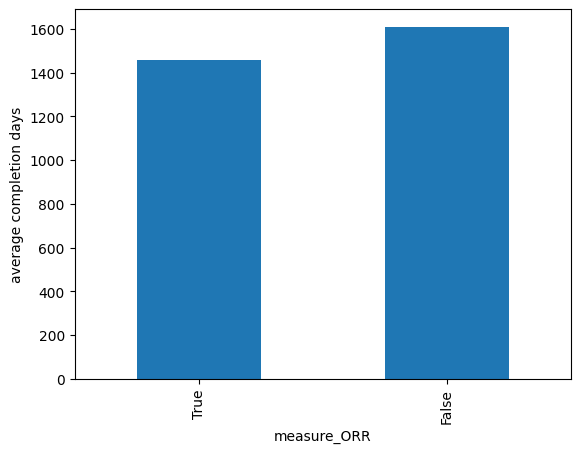

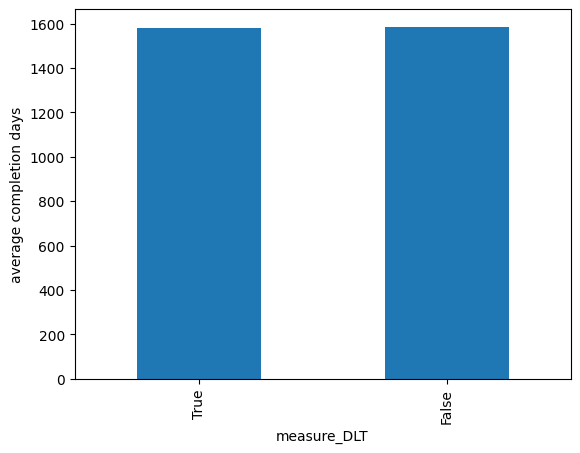

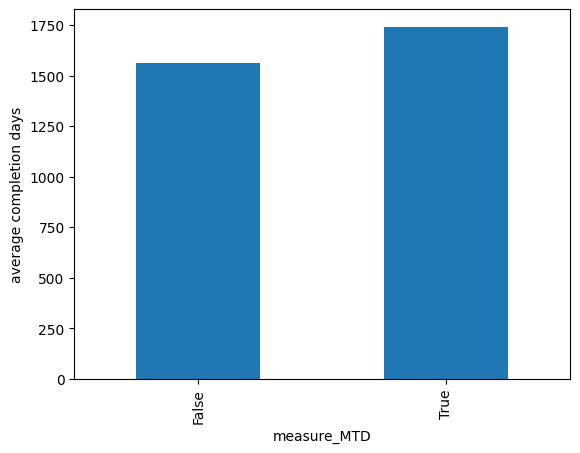

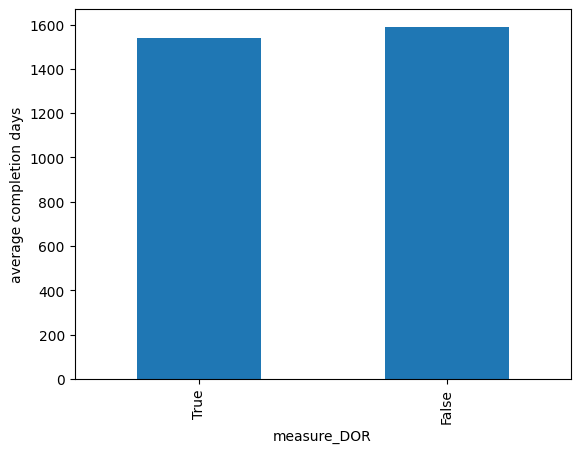

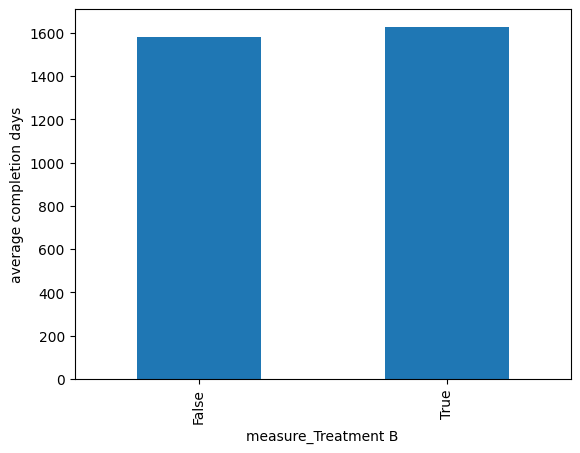

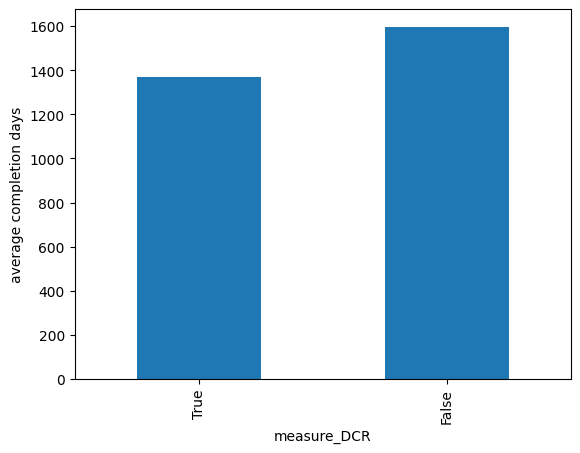

In [13]:
import matplotlib.pyplot as plt

for col in df.columns:
    if col.startswith("measure_"):
        df.groupby(col)['duration'].mean().sort_values().plot(kind = 'bar')
        plt.ylabel('average completion days')
        plt.show()

## Analyze Interventions

In [14]:
intervention_count = defaultdict(int)
intervention_category_count = defaultdict(int)
for interventions in df.interventions:
    for intervention in interventions.split('|'):
        intervention_count[intervention] += 1
        intervention_category_count[intervention.split(':')[0].lower()] += 1
print(sorted(intervention_count.items(), key=lambda x:x[1], reverse=True)[:10])
print(sorted(intervention_category_count.items(), key=lambda x:x[1], reverse=True)[:10])

[('Drug: Carboplatin', 44), ('Drug: Cisplatin', 33), ('Drug: Pemetrexed', 32), ('Drug: Paclitaxel', 29), ('Drug: cisplatin', 27), ('Drug: paclitaxel', 25), ('Drug: carboplatin', 23), ('Drug: Erlotinib', 23), ('Radiation: radiation therapy', 21), ('Other: laboratory biomarker analysis', 20)]
[('drug', 1392), ('biological', 215), ('other', 99), ('radiation', 80), ('procedure', 72), ('device', 20), ('genetic', 12), ('combination product', 6), ('behavioral', 3), ('diagnostic test', 2)]


In [15]:
top_5_intervention = sorted(intervention_category_count, key=lambda x: intervention_category_count[x], reverse=True)[:5]
if 'radiation' not in top_5_intervention:
    top_5_intervention.append('radiation')
for category in top_5_intervention:
    df[f"{category}_included"] = df.interventions.apply(lambda x: any(intervertion.split(':')[0].lower()==category for intervertion in x.split('|')))
df['intervention_count'] = df.interventions.apply(lambda x: len(x.split("|")))

In [16]:
print(df.interventions[0])
df.head(104).transpose()

Biological: vaccine 1650-G


,0,1,2,3,4,5,6,10,11,12,...,104,105,106,107,108,109,110,111,113,114
rank,1,2,3,4,5,6,7,11,12,13,...,105,106,107,108,109,110,111,112,114,115
nct_number,NCT01829373,NCT00401778,NCT00132054,NCT02429843,NCT00084799,NCT01486602,NCT00005022,NCT00062322,NCT00059761,NCT00857025,...,NCT01931787,NCT00555256,NCT01121575,NCT01302808,NCT00569114,NCT00731952,NCT00633724,NCT01454102,NCT00874588,NCT00870532
title,Lung Cancer Vaccine Plus Oral Dietary Supplement,Trial of RAD001 in Patients With Operable Non-...,Amrubicin and Irinotecan in Treating Patients ...,A Study of TRC105 in Combination With Paclitax...,Monoclonal Antibody Therapy in Treating Patien...,Specialized Radiation Therapy and Chemotherapy...,Radiation Therapy Plus Combination Chemotherap...,Neoadjuvant Chemoradiotherapy Followed By Surg...,Chemotherapy Combined With Radiation Therapy i...,Beta-Glucan in Treating Patients With Locally ...,...,CPI-613 in Treating Patients With Relapsed or ...,A Phase I Study of SUNITINIB and Rapamycin in ...,A Study Of Combined C- MET Inhibitor And PAN-H...,Romidepsin and Erlotinib Hydrochloride in Trea...,Phase 1 Study of TG01 and Erlotinib in Non-sma...,Phase I Study of Induction Therapy With VELCAD...,Multiple-Vaccine Therapy in Treating Patients ...,Study of Nivolumab (BMS-936558) in Combination...,Peptide Vaccine Targeting to Cancer Specific A...,Study of Combination of Metronomic Oral Vinore...
acronym,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SU/Rapamycin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,...,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed
study_results,No Results Available,Has Results,No Results Available,No Results Available,Has Results,No Results Available,No Results Available,No Results Available,No Results Available,No Results Available,...,No Results Available,No Results Available,Has Results,Has Results,No Results Available,No Results Available,No Results Available,Has Results,No Results Available,No Results Available
conditions,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,Lung Cancer,...,Recurrent Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non Small Cell Lung Cancer,Lung Cancer|Metastatic Cancer,Non-small Cell Lung Cancer,Non Small Cell Lung Cancer,Non Small Cell Lung Cancer,Non-small Cell Lung Cancer,Non Small Cell Lung Cancer,Non-Small Cell Lung Cancer
interventions,Biological: vaccine 1650-G,Drug: RAD001,Drug: amrubicin hydrochloride|Drug: irinotecan...,Drug: TRC105,Biological: monoclonal antibody hu3S193,Drug: carboplatin|Drug: paclitaxel|Radiation: ...,Drug: cisplatin|Drug: etoposide|Radiation: rad...,Drug: cisplatin|Drug: irinotecan hydrochloride...,Drug: cisplatin|Drug: irinotecan hydrochloride...,Biological: beta-glucan MM-10-001|Other: flow ...,...,"Drug: 6,8-bis(benzylthio)octanoic acid",Drug: sunitinib and rapamycin (Drug will be held),Drug: PF-02341066|Drug: PF-00299804,Combination Product: Erlotinib plus Romidepsin...,Drug: TG01,Drug: Velcade and Vorinostat,"Biological: HLA-A*2402restricted URLC10, TTK, ...",Biological: Nivolumab|Drug: Gemcitabine|Drug: ...,"Biological: HLA-A*2402restricted URLC10, CDCA1...",Drug: oral vinorelbine|Drug: sorafenib
outcome_measures,Immunologic response to vaccine,Clinical Response as Assessed Metabolically by...,,Number of patients with a change in medical ma...,Confirmation of Tumor Targeting as Measured by...,Maximum-tolerated RT dose fraction|Radiographi...,Frequency of patients developing unacceptable ...,,Maximum tolerated dose of irinotecan in combin...,Safety|Maximum-tolerated dose|Toxicity as asse...,...,"Tumor response rates, defined as the proportio...",To define the optimal dose of sunitinib when g...,Overview of Treatment-emergent All Causalities...,Number of Participants With Dose Limiting Toxi...,"Saftey, maximum tolerated dose, optimal biolog..

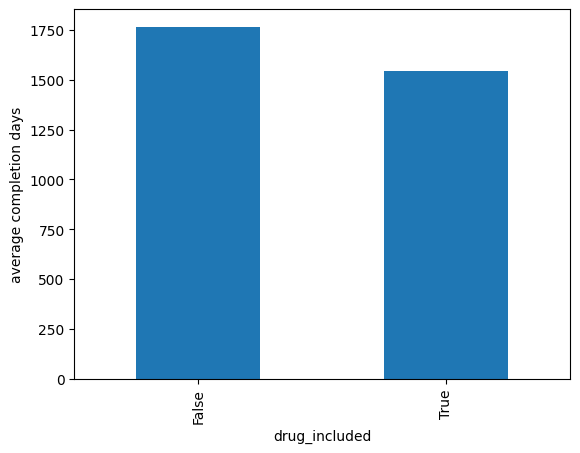

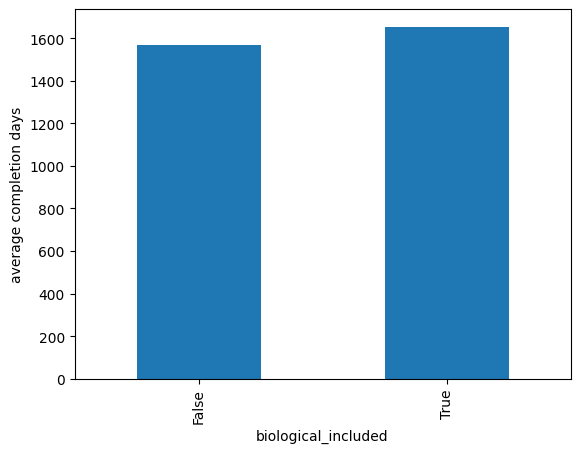

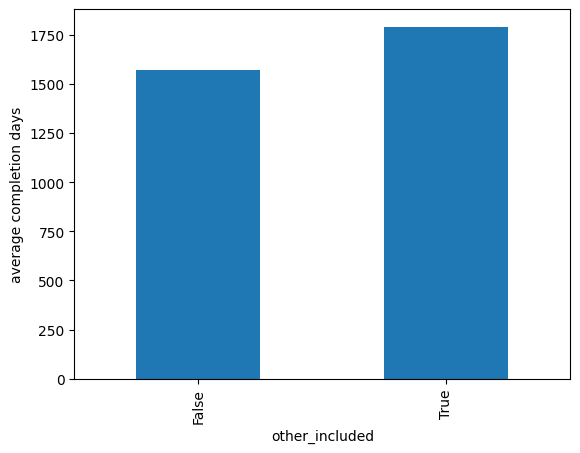

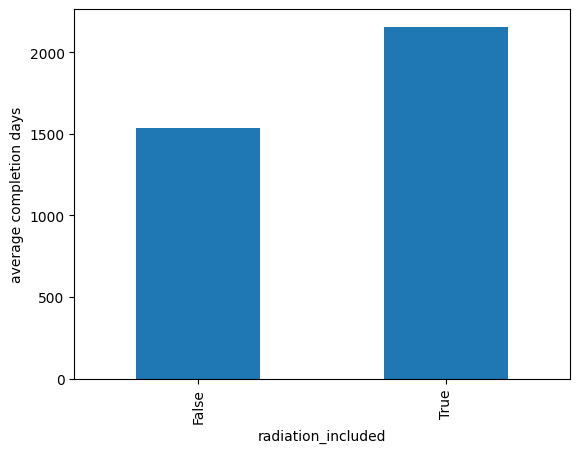

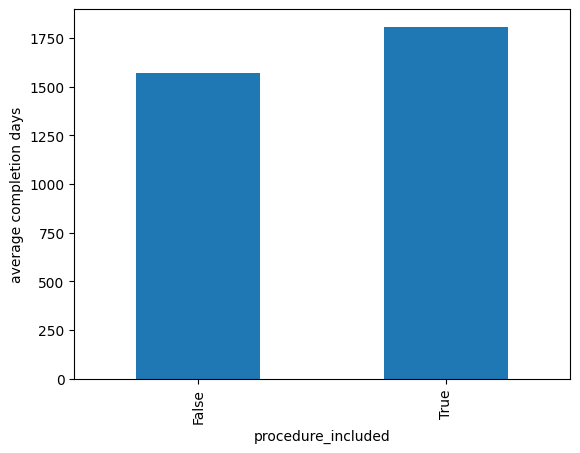

In [17]:
for col in df.columns:
    if col.endswith("_included"):
        df.groupby(col)['duration'].mean().sort_index().plot(kind = 'bar')
        plt.ylabel('average completion days')
        plt.show()

Text(0, 0.5, 'average completion days')

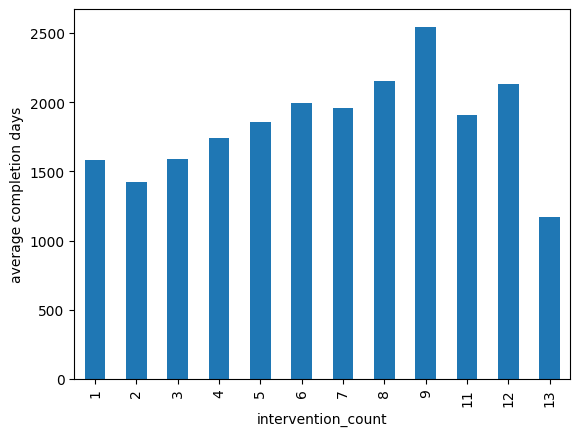

In [18]:
df.groupby('intervention_count')['duration'].mean().plot(kind = 'bar')
plt.ylabel('average completion days')

1     346
2     238
3     125
4      60
5      27
6      18
7      10
8       6
9       5
12      2
11      2
13      1
Name: intervention_count, dtype: int64


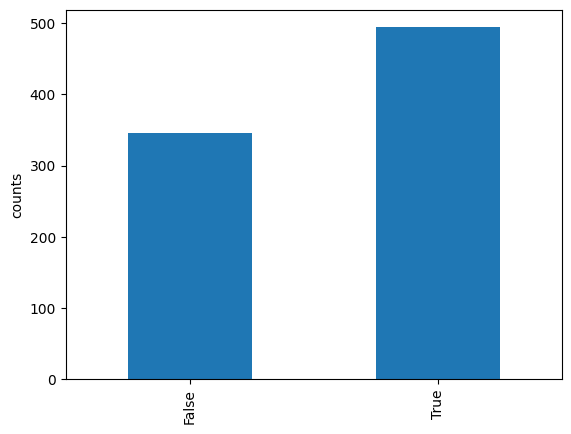

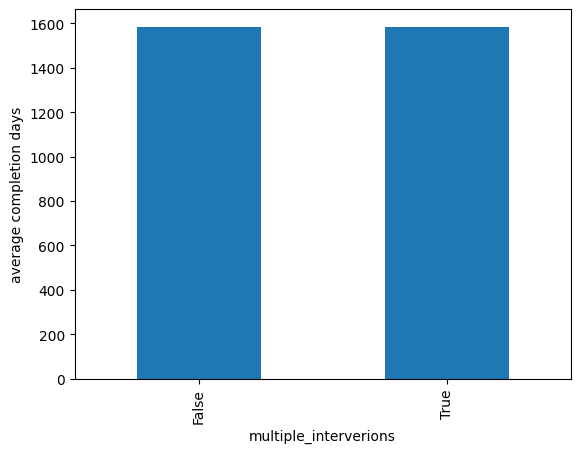

In [19]:
print(df.intervention_count.value_counts())
df['multiple_interverions'] = df.intervention_count>1
df['multiple_interverions'].value_counts().sort_index().plot(kind = 'bar')
plt.ylabel('counts')
plt.show()

df.groupby('multiple_interverions')['duration'].mean().sort_index().plot(kind = 'bar')
plt.ylabel('average completion days')
plt.show()

## Analyze Locations

In [20]:
location_count = defaultdict(int)
country_count = defaultdict(int)
df.locations = df.locations.fillna('')
for locations in df.locations:
    try:
        for location in locations.split('|'):
            location_count[location] += 1
            country_count[location.split(',')[-1].strip()] += 1
    except:
        print(locations)
print(sorted(location_count.items(), key=lambda x:x[1], reverse=True)[:10])
print(sorted(country_count.items(), key=lambda x:x[1], reverse=True)[:10])

[('Memorial Sloan Kettering Cancer Center, New York, New York, United States', 38), ('Massachusetts General Hospital, Boston, Massachusetts, United States', 29), ('University of Texas MD Anderson Cancer Center, Houston, Texas, United States', 29), ('', 28), ('Roswell Park Cancer Institute, Buffalo, New York, United States', 23), ('Fox Chase Cancer Center, Philadelphia, Pennsylvania, United States', 23), ('Sarah Cannon Research Institute, Nashville, Tennessee, United States', 23), ('MD Anderson Cancer Center, Houston, Texas, United States', 22), ('Research Site, Seoul, Korea, Republic of', 21), ('Memorial Sloan-Kettering Cancer Center, New York, New York, United States', 20)]
[('United States', 4703), ('Spain', 347), ('France', 211), ('Canada', 205), ('United Kingdom', 184), ('Republic of', 160), ('Italy', 145), ('Germany', 137), ('Japan', 136), ('Australia', 118)]


In [21]:
for country in sorted(country_count, key=lambda x: country_count[x], reverse=True)[:10]:
    df[f"include_country_{country}"] = df.locations.apply(lambda x: any(location.split(',')[-1].strip()==country for location in x.split('|')))

def get_lead_country(locations):
    if not locations:
        return 'Others'
    location_list = locations.split('|')
    lead_country = location_list[0].split(',')[-1].strip()
    if lead_country in sorted(country_count, key=lambda x: country_count[x], reverse=True)[:4]:
        return lead_country
    return 'Others'
df[f"lead_country"] = df.locations.apply(get_lead_country)
df['location_count'] = df.locations.apply(lambda x: len(x.split("|")))

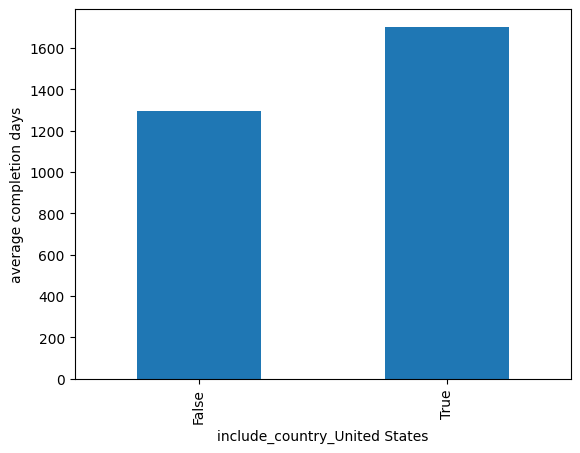

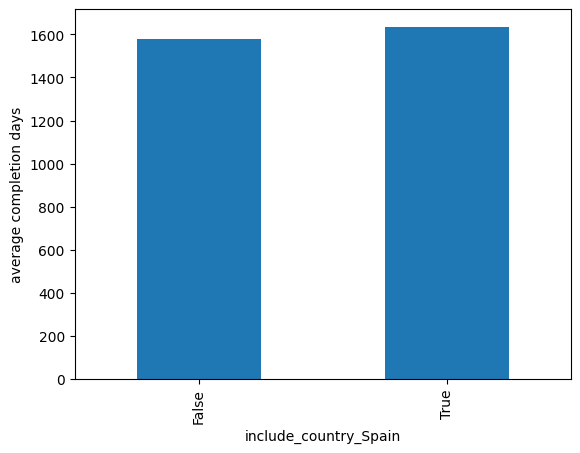

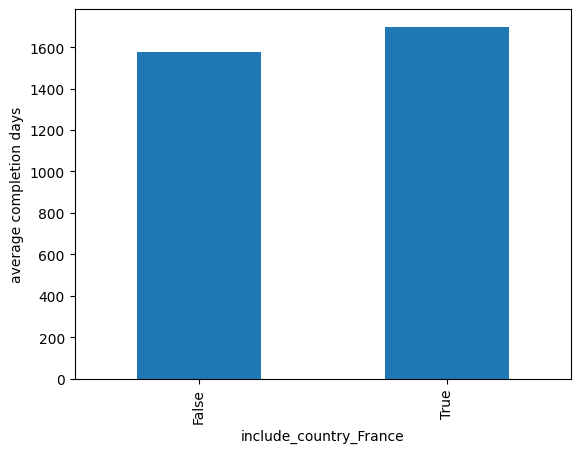

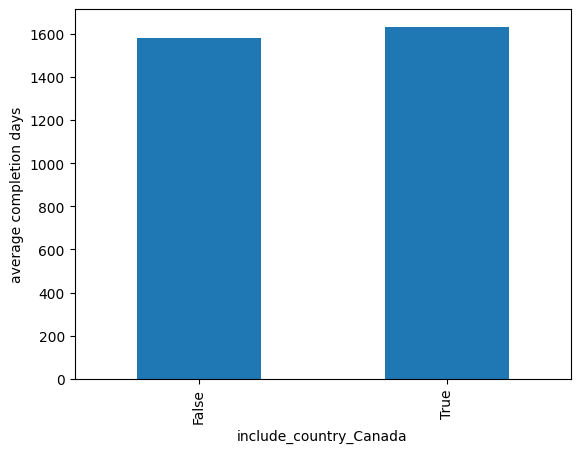

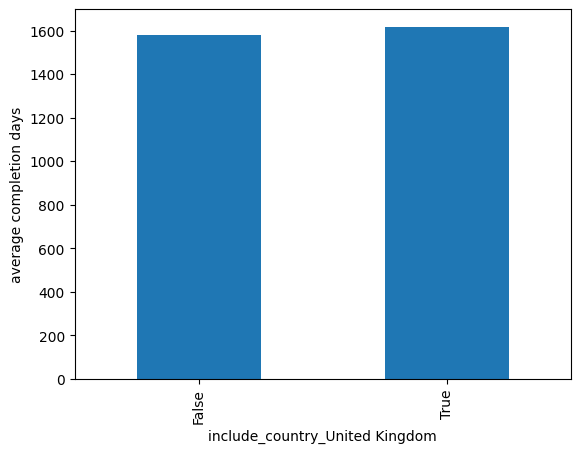

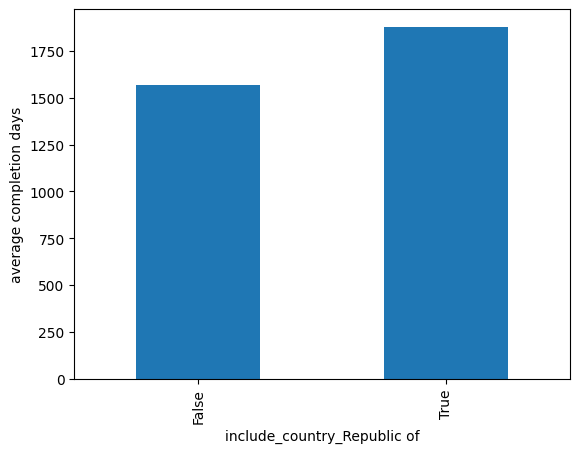

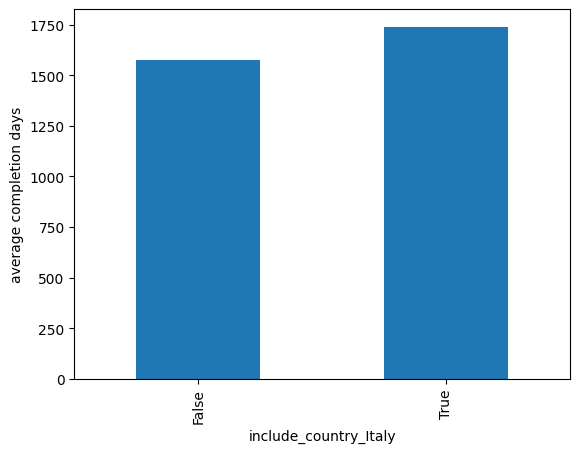

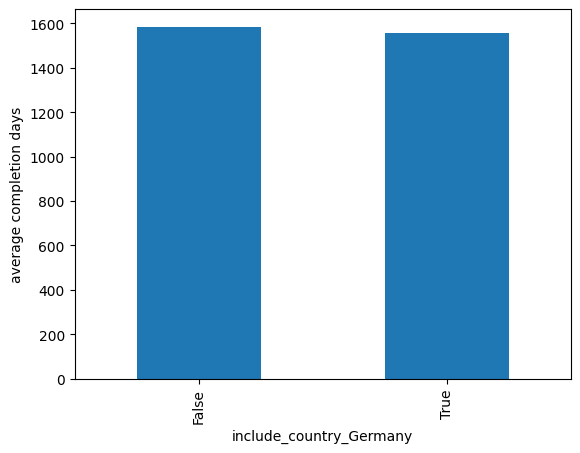

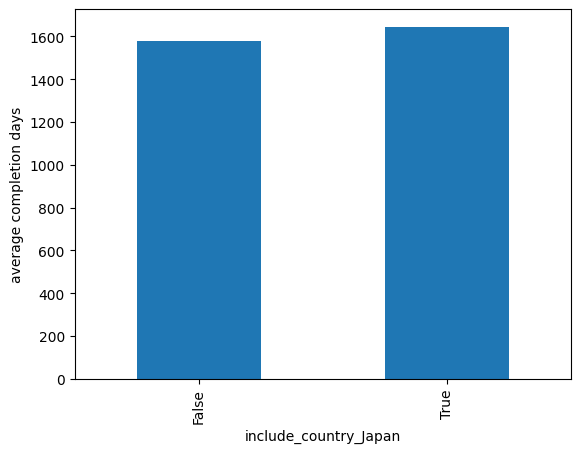

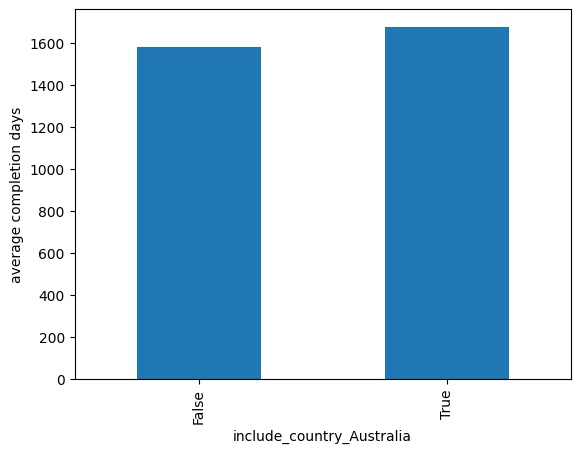

In [22]:
for col in df.columns:
    if col.startswith("include_country_"):
        df.groupby(col)['duration'].mean().sort_index().plot(kind = 'bar')
        plt.ylabel('average completion days')
        plt.show()

United States    595
Others           199
Canada            29
France            10
Spain              7
Name: lead_country, dtype: int64


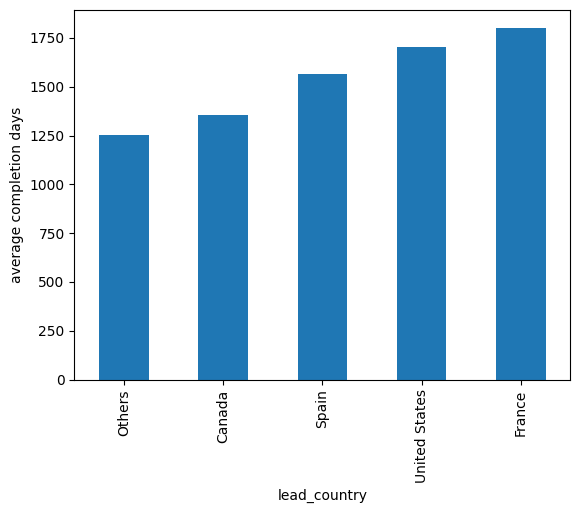

In [23]:
print(df.lead_country.value_counts())
df.groupby('lead_country')['duration'].mean().sort_values().plot(kind = 'bar')
plt.ylabel('average completion days')
plt.show()

1     351
2      73
4      60
3      51
5      42
     ... 
49      1
87      1
69      1
51      1
74      1
Name: location_count, Length: 65, dtype: int64


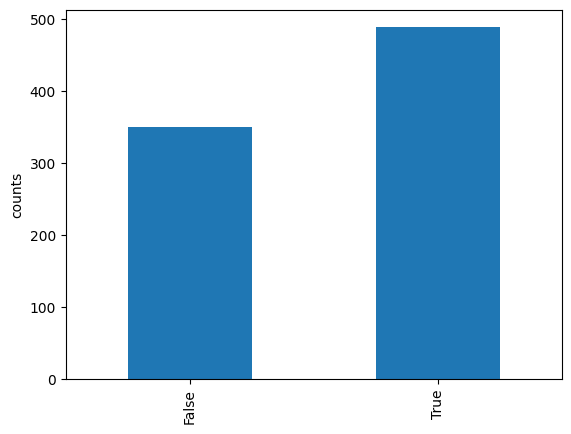

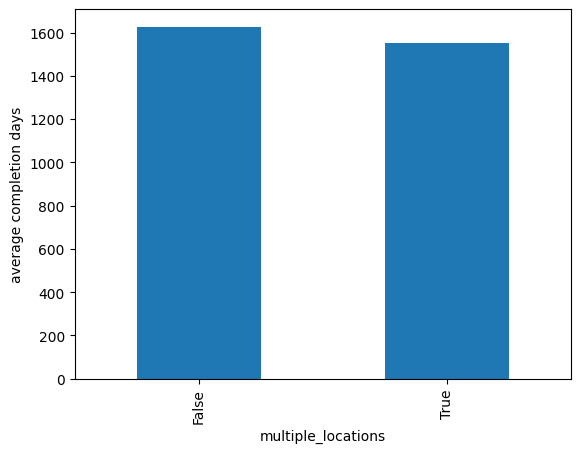

In [24]:
print(df.location_count.value_counts())
df['multiple_locations'] = df.location_count>1
df['multiple_locations'].value_counts().sort_index().plot(kind = 'bar')
plt.ylabel('counts')
plt.show()

df.groupby('multiple_locations')['duration'].mean().sort_index().plot(kind = 'bar')
plt.ylabel('average completion days')
plt.show()

## Analyze Sponsor/Collaborators

In [25]:
sponsor_count = defaultdict(int)
for sonpsors in df['sponsor/collaborators']:
    for sponsor in sonpsors.split('|'):
        sponsor_count[sponsor] += 1
print(sorted(sponsor_count.items(), key=lambda x:x[1], reverse=True)[:5])

[('National Cancer Institute (NCI)', 128), ('AstraZeneca', 40), ('Merck Sharp & Dohme LLC', 33), ('Eli Lilly and Company', 32), ('Bristol-Myers Squibb', 30)]


False    712
True     128
Name: national_cancer_institute_(nci)_as_sponsor, dtype: int64
national_cancer_institute_(nci)_as_sponsor
False    1475.830056
True     2186.789062
Name: duration, dtype: float64


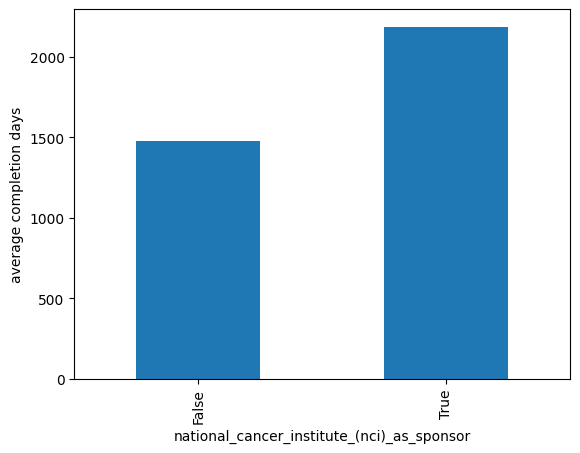

False    800
True      40
Name: astrazeneca_as_sponsor, dtype: int64
astrazeneca_as_sponsor
False    1581.85375
True     1630.42500
Name: duration, dtype: float64


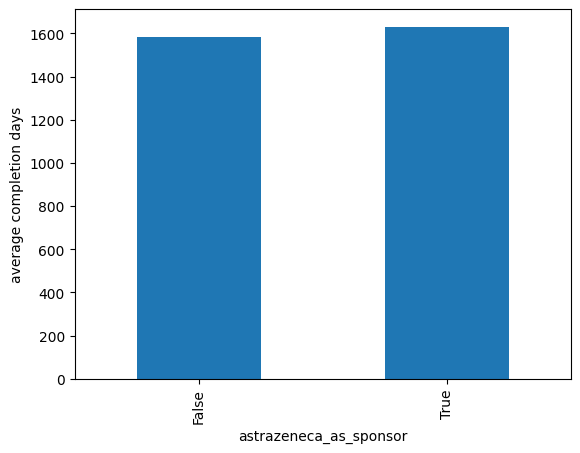

False    807
True      33
Name: merck_sharp_&_dohme_llc_as_sponsor, dtype: int64
merck_sharp_&_dohme_llc_as_sponsor
False    1584.254027
True     1582.030303
Name: duration, dtype: float64


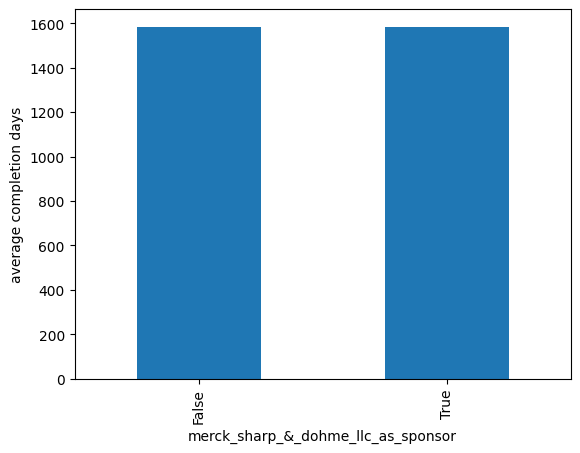

False    808
True      32
Name: eli_lilly_and_company_as_sponsor, dtype: int64
eli_lilly_and_company_as_sponsor
False    1588.457921
True     1475.812500
Name: duration, dtype: float64


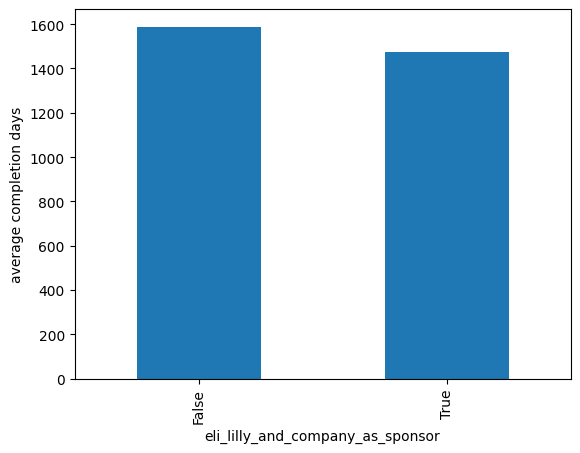

False    810
True      30
Name: bristol-myers_squibb_as_sponsor, dtype: int64
bristol-myers_squibb_as_sponsor
False    1577.81358
True     1755.70000
Name: duration, dtype: float64


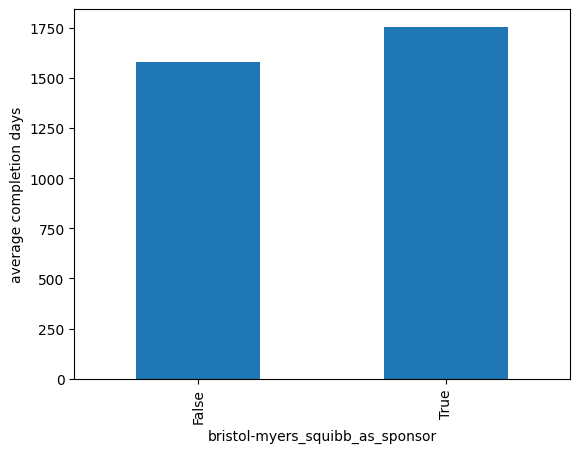

In [26]:
top_5_sponsor = sorted(sponsor_count.keys(), key=lambda x:sponsor_count[x], reverse=True)[:5]
for sponsor in top_5_sponsor:
    col_name = f'{sponsor}_as_sponsor'
    col_name = col_name.lower().replace(" ", "_").replace(",", "")
    df[col_name] = df['sponsor/collaborators'].apply(lambda x: sponsor in x.split("|"))
    print(df[col_name].value_counts())
    print(df.groupby(col_name)['duration'].mean())
    df.groupby(col_name)['duration'].mean().sort_index().plot(kind = 'bar')
    plt.ylabel('average completion days')
    plt.show()

In [27]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.replace(";", "") if type(x)==str else x)
df['lead_aes'] = df['lead_outcome_measure'].apply(lambda x: 1 if x=='AEs' else 0)
df['lead_mtd'] = df['lead_outcome_measure'].apply(lambda x: 1 if x=='MTD' else 0)
df['lead_dlt'] = df['lead_outcome_measure'].apply(lambda x: 1 if x=='DLT' else 0)
df.to_csv(f"../data/updated_{filename}.csv", index=False)
df.head(100).transpose()

,0,1,2,3,4,5,6,10,11,12,...,100,101,102,103,104,105,106,107,108,109
rank,1,2,3,4,5,6,7,11,12,13,...,101,102,103,104,105,106,107,108,109,110
nct_number,NCT01829373,NCT00401778,NCT00132054,NCT02429843,NCT00084799,NCT01486602,NCT00005022,NCT00062322,NCT00059761,NCT00857025,...,NCT02503358,NCT01189968,NCT01165216,NCT01225302,NCT01931787,NCT00555256,NCT01121575,NCT01302808,NCT00569114,NCT00731952
title,Lung Cancer Vaccine Plus Oral Dietary Supplement,Trial of RAD001 in Patients With Operable Non-...,Amrubicin and Irinotecan in Treating Patients ...,A Study of TRC105 in Combination With Paclitax...,Monoclonal Antibody Therapy in Treating Patien...,Specialized Radiation Therapy and Chemotherapy...,Radiation Therapy Plus Combination Chemotherap...,Neoadjuvant Chemoradiotherapy Followed By Surg...,Chemotherapy Combined With Radiation Therapy i...,Beta-Glucan in Treating Patients With Locally ...,...,Selumetinib and Paclitaxel as Second-Line Trea...,A Study of Carboplatin and Pemetrexed Plus Dem...,Japanese Study of Ipilimumab Administered in C...,A Study of Linifanib (ABT-869) in Combination ...,CPI-613 in Treating Patients With Relapsed or ...,A Phase I Study of SUNITINIB and Rapamycin in ...,A Study Of Combined C- MET Inhibitor And PAN-H...,Romidepsin and Erlotinib Hydrochloride in Trea...,Phase 1 Study of TG01 and Erlotinib in Non-sma...,Phase I Study of Induction Therapy With VELCAD...
acronym,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,SU/Rapamycin,NaN,NaN,NaN,NaN
status,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,...,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eli_lilly_and_company_as_sponsor,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bristol-myers_squibb_as_sponsor,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
lead_aes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lead_mtd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['duration'],axis=1), df['duration'], 
#                                                    test_size=0.33, random_state=42,)

In [29]:
#X_train.head(2)
#X_test.head(2)
#y_train.head(2)
#y_test.head(2)

In [30]:
#y_test

In [31]:
#gbm = lgb.LGBMRegressor(n_estimators=200,)
#gbm.fit(X_train, y_train,
#        eval_set=[(X_test, y_test)],
#        eval_metric='l2')